In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('drive')

df_vacsi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DANA/vacsi12-fra-2021-10-15-19h08.csv', sep=';')
df_epid = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DANA/table-indicateurs-open-data-france.csv', sep=',')

Mounted at drive


## Exploration des datasets

In [ ]:
print(df_vacsi.shape,df_epid.shape,df_vacsi.head(5),df_epid.head(5))

(292, 8) (579, 5)   fra        jour  n_dose1  ...  n_cum_complet  couv_dose1  couv_complet
0  FR  2020-12-27      417  ...             51         0.0           0.0
1  FR  2020-12-28      430  ...             89         0.0           0.0
2  FR  2020-12-29      274  ...            106         0.0           0.0
3  FR  2020-12-30      330  ...            121         0.0           0.0
4  FR  2020-12-31      259  ...            140         0.0           0.0

[5 rows x 8 columns]   extract_date   tx_incid   R  taux_occupation_sae  tx_pos
0   2020-03-18        NaN NaN                 15.2     NaN
1   2020-03-19   5.570823 NaN                 19.8     NaN
2   2020-03-20   8.403950 NaN                 25.6     NaN
3   2020-03-21  11.013409 NaN                 28.7     NaN
4   2020-03-22  13.600502 NaN                 33.1     NaN


In [ ]:
print(df_vacsi.columns,df_vacsi[['n_dose1','n_cum_dose1','couv_dose1']])

Index(['fra', 'jour', 'n_dose1', 'n_complet', 'n_cum_dose1', 'n_cum_complet',
       'couv_dose1', 'couv_complet'],
      dtype='object')      n_dose1  n_cum_dose1  couv_dose1
0        417          417         0.0
1        430          847         0.0
2        274         1121         0.0
3        330         1451         0.0
4        259         1710         0.0
..       ...          ...         ...
287     3778     50640913        87.8
288    26613     50667526        87.9
289    28056     50695582        87.9
290    36926     50732508        88.0
291    27217     50759725        88.0

[292 rows x 3 columns]


In [ ]:
df_epid = df_epid.rename({'extract_date': 'jour'}, axis='columns')
print(df_epid.columns,df_epid[['tx_incid', 'R','jour']])

Index(['jour', 'tx_incid', 'R', 'taux_occupation_sae', 'tx_pos'], dtype='object')       tx_incid   R        jour
0          NaN NaN  2020-03-18
1     5.570823 NaN  2020-03-19
2     8.403950 NaN  2020-03-20
3    11.013409 NaN  2020-03-21
4    13.600502 NaN  2020-03-22
..         ...  ..         ...
574  46.031442 NaN  2021-10-13
575  48.483949 NaN  2021-10-14
576        NaN NaN  2021-10-15
577        NaN NaN  2021-10-16
578        NaN NaN  2021-10-17

[579 rows x 3 columns]


In [ ]:
df = df_epid.merge(df_vacsi,how = 'inner',on='jour')

In [ ]:
df.columns
df.tail(5)

,jour,tx_incid,R,taux_occupation_sae,tx_pos,fra,n_dose1,n_complet,n_cum_dose1,n_cum_complet,couv_dose1,couv_complet
287,2021-10-10,43.622144,NaN,22.4,1.022478,FR,3778,7413,50640913,49199596,87.8,85.3
288,2021-10-11,44.256876,NaN,22.6,1.042895,FR,26613,49537,50667526,49249133,87.9,85.4
289,2021-10-12,45.003356,NaN,22.0,1.064392,FR,28056,50210,50695582,49299343,87.9,85.5
290,2021-10-13,46.031442,NaN,21.6,1.086855,FR,36926,61341,50732508,49360684,88.0,85.6
291,2021-10-14,48.483949,NaN,21.3,1.074309,FR,27217,48496,50759725,49409180,88.0,85.7


## Corrélation entre les annonces politiques sur les pics de vaccination :

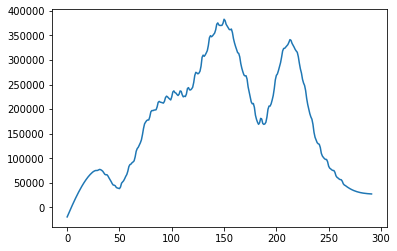

In [ ]:
from scipy.signal import savgol_filter
X = df.index
Y = df['n_dose1']
y = savgol_filter(Y, 51, 3) #lissage de Y
plt.plot(X,y)

In [ ]:
df.nlargest(2, 'n_dose1')

,jour,tx_incid,R,taux_occupation_sae,tx_pos,fra,n_dose1,n_complet,n_cum_dose1,n_cum_complet,couv_dose1,couv_complet
144,2021-05-20,134.327657,0.86,74.5,3.823281,FR,503604,204429,22521104,10529136,39.1,18.3
214,2021-07-29,224.770932,1.40,20.1,4.346875,FR,486674,357243,41956096,34924997,72.7,60.6


On obtient deux pics de vaccination :
- le premier correspond à l'ouverture de la vaccination au plus de 18 ans
- le second correspond à l'annonce du président Macron concernant le pass sanitaire

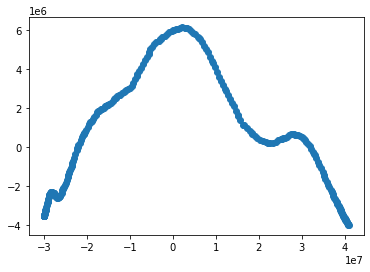

In [ ]:
from sklearn import preprocessing
from sklearn.decomposition import PCA 
df_pca = df.drop(['jour','fra','R'], axis=1)
data = df_pca.values
pca_solver = PCA(2) 
new_data = pca_solver.fit_transform(data)

fig = plt.figure()
plt.scatter(new_data[:,0], new_data[:,1])  
plt.show()

Ici, la PCA n'apporte pas d'information car la dimension de nos données est déjà relativement faible.

In [ ]:
df

,jour,tx_incid,R,taux_occupation_sae,tx_pos,fra,n_dose1,n_complet,n_cum_dose1,n_cum_complet,couv_dose1,couv_complet
0,2020-12-27,123.044038,0.95,52.4,2.809808,FR,417,51,417,51,0.0,0.0
1,2020-12-28,124.204732,0.94,53.3,3.156600,FR,430,38,847,89,0.0,0.0
2,2020-12-29,126.003138,0.95,52.7,3.738989,FR,274,17,1121,106,0.0,0.0
3,2020-12-30,129.529921,0.96,52.4,4.497706,FR,330,15,1451,121,0.0,0.0
4,2020-12-31,133.357680,0.99,51.9,5.055753,FR,259,19,1710,140,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
287,2021-10-10,43.622144,NaN,22.4,1.022478,FR,3778,7413,50640913,49199596,87.8,85.3
288,2021-10-11,44.256876,NaN,22.6,1.042895,FR,26613,49537,50667526,49249133,87.9,85.4
289,2021-10-12,45.003356,NaN,22.0,1.064392,FR,28056,50210,50695582,49299343,87.9,85.5
290,2021-10-13,46.031442,NaN,21.6,1.086855,FR,36926,61341,50732508,49360684,88.0,85.6


## Quelques visualisations :

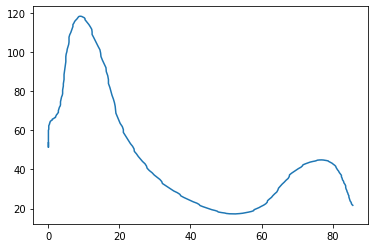

In [ ]:
from scipy.signal import savgol_filter
X = df['couv_complet']
Y = df['taux_occupation_sae']
y = savgol_filter(Y, 51, 3) #lissage de Y
plt.plot(X,y)

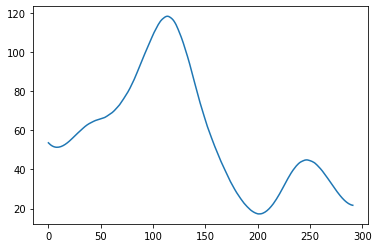

In [ ]:
from scipy.signal import savgol_filter
X = df.index
Y = df['taux_occupation_sae']
y = savgol_filter(Y, 51, 3) #lissage de Y
plt.plot(X,y)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DANA/synthese-fra (1).csv')

In [ ]:
df2

,date,total_cas_confirmes,total_deces_hopital,total_deces_ehpad,total_cas_confirmes_ehpad,total_cas_possibles_ehpad,patients_reanimation,patients_hospitalises,total_patients_gueris,nouveaux_patients_hospitalises,nouveaux_patients_reanimation
0,2020-03-02,191,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-03,212,4,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
2,2020-03-04,285,4,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN
3,2020-03-05,423,7,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN
4,2020-03-06,613,9,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
590,2021-10-13,7069089,90280,26865.0,NaN,NaN,1091.0,6601.0,424238.0,219.0,58.0
591,2021-10-14,7074276,90318,26867.0,NaN,NaN,1075.0,6523.0,424464.0,206.0,44.0
592,2021-10-15,7080375,90352,26869.0,NaN,NaN,1051.0,6470.0,424693.0,215.0,43.0
593,2021-10-16,7085274,90367,26869.0,NaN,NaN,1049.0,6437.0,424817.0,109.0,25.0


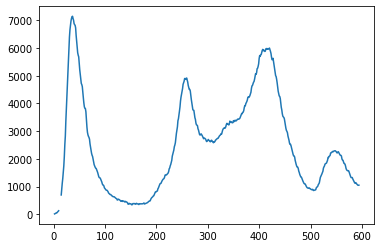

In [ ]:
from scipy.signal import savgol_filter
X = df2.index
Y = df2['patients_reanimation']
#y = savgol_filter(Y, 51, 3) #lissage de Y
plt.plot(X,Y)

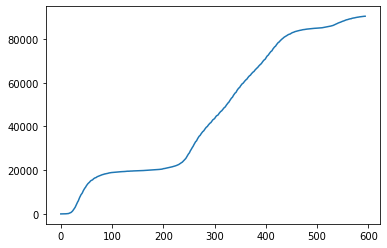

In [ ]:
from scipy.signal import savgol_filter
X = df2.index
Y = df2['total_deces_hopital']
#y = savgol_filter(Y, 51, 3) #lissage de Y
plt.plot(X,Y)

https://github.com/CSSEGISandData/COVID-19 liens

## Corrélation entre décès et cas confirmés :

In [ ]:
df_cas_deces = df2[['total_cas_confirmes','total_deces_hopital']]
df_cas_deces.corr()

,total_cas_confirmes,total_deces_hopital
total_cas_confirmes,1.000000,0.988841
total_deces_hopital,0.988841,1.000000


La corrélation entre ces deux indicateurs est très importante.


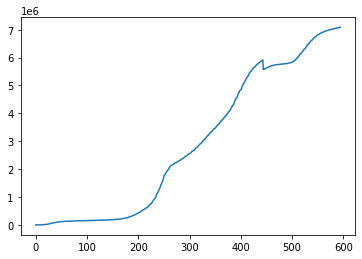

In [ ]:
Y_2 = df2['total_cas_confirmes']
plt.plot(X,Y_2)

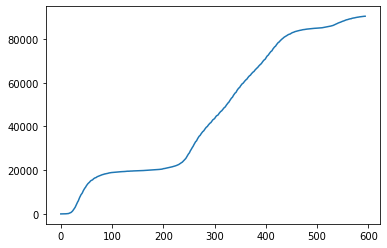

In [ ]:
plt.plot(X,Y)

On remarque que la courbe des décès suit effectivement celle des cas confirmés sauf au début de l'épidémie, ce qui s'explique par l'absence de tests réalisé au début de l'épidémie. On peut donc pensé que le nombre de cas réels était bien supérieur aux chiffres annoncé à cette période. 

Trouvons le nombre de cas réel pendant le début de l'épidémie à l'aide du ML :

In [ ]:
from sklearn.model_selection import train_test_split

X = np.array(df2['total_deces_hopital'].values)
Y = np.array(df2['total_cas_confirmes'].values)

X_train = X[260:].reshape(-1, 1)
X_test = X[:260].reshape(-1, 1)
y_train = Y[260:].reshape(-1, 1)
y_test = Y[:260].reshape(-1, 1)

print(y_test.shape)

(260, 1)


In [ ]:
from sklearn import linear_model

model_lasso = linear_model.LassoCV()
model_lasso.fit(X_train,y_train)

y_pred = model_lasso.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(y_pred.reshape(1, -1).shape)

(1, 260)


Text(0.5, 1.0, 'évolution du nombre de décès au cours de l épidémie')

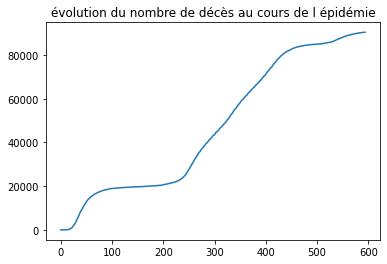

In [ ]:
plt.plot(df2.index.values.reshape(-1, 1),X)
plt.title('évolution du nombre de décès au cours de l épidémie')

Text(0.5, 1.0, 'évolution du nombre de cas au cours de l épidémie (resultats officiels)')

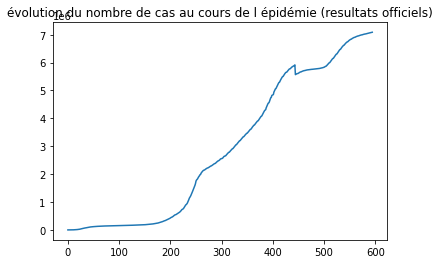

In [ ]:
plt.plot(df2.index.values.reshape(-1, 1),Y)
plt.title('évolution du nombre de cas au cours de l épidémie (resultats officiels)')

Text(0.5, 1.0, 'évolution du nombre de cas au cours de l épidémie en considérant que des tests ont été effectués dès le début (nombre de cas réel)')

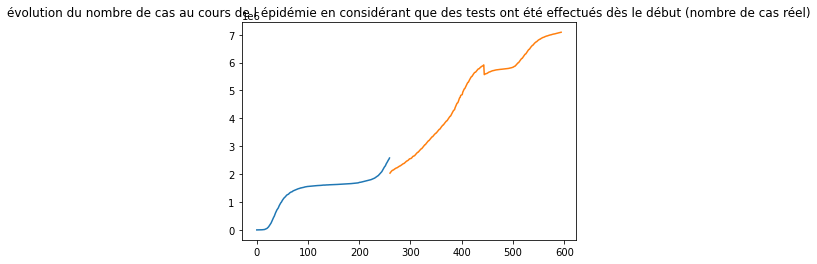

In [ ]:
plt.plot(df2.index.values.reshape(-1, 1)[:260],y_pred+939215)
plt.plot(df2.index.values.reshape(-1, 1)[260:],y_train)
plt.title('évolution du nombre de cas au cours de l épidémie en considérant que des tests ont été effectués dès le début (nombre de cas réel)')

On remarque que si il y avait eu effectivement autant de test effectué au début de l'épidémie qu'à partir du 260ème jour (jour considérer arbitrairement comme celui à partir duquel les gens vont se faire tester en masse), on aurait un nombre de cas confirmé bien supérieur au début de l'épidémie (courbe orange vs rouge). Donc le nombre de cas annoncé au début de l'épidémie ne correspondait pas au nombre de cas réel (ce qui est du au manque de tests réalisés au début).

# Création d'un nouveau dataframe et d'une nouvelle colonne :

In [ ]:
df2 = df2.rename({'date': 'jour'}, axis='columns')
df3 = df_epid.merge(df2,how = 'inner',on='jour')

In [ ]:
df3

,jour,tx_incid,R,taux_occupation_sae,tx_pos,total_cas_confirmes,total_deces_hopital,total_deces_ehpad,total_cas_confirmes_ehpad,total_cas_possibles_ehpad,patients_reanimation,patients_hospitalises,total_patients_gueris,nouveaux_patients_hospitalises,nouveaux_patients_reanimation
0,2020-03-18,NaN,NaN,15.2,NaN,9134,264,NaN,NaN,NaN,931.0,3626.0,1000.0,NaN,NaN
1,2020-03-19,5.570823,NaN,19.8,NaN,10995,372,NaN,NaN,NaN,1122.0,4461.0,1300.0,2229.0,438.0
2,2020-03-20,8.403950,NaN,25.6,NaN,12612,450,NaN,NaN,NaN,1297.0,5226.0,1587.0,1256.0,242.0
3,2020-03-21,11.013409,NaN,28.7,NaN,14459,562,NaN,NaN,NaN,1525.0,6172.0,1811.0,1540.0,298.0
4,2020-03-22,13.600502,NaN,33.1,NaN,16689,674,NaN,NaN,NaN,1746.0,7240.0,2200.0,1534.0,309.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,2021-10-13,46.031442,NaN,21.6,1.086855,7069089,90280,26865.0,NaN,NaN,1091.0,6601.0,424238.0,219.0,58.0
575,2021-10-14,48.483949,NaN,21.3,1.074309,7074276,90318,26867.0,NaN,NaN,1075.0,6523.0,424464.0,206.0,44.0
576,2021-10-15,NaN,NaN,20.8,NaN,7080375,90352,26869.0,NaN,NaN,1051.0,6470.0,424693.0,215.0,43.0
577,2021-10-16,NaN,NaN,20.7,NaN,7085274,90367,26869.0,NaN,NaN,1049.0,6437.0,424817.0,109.0,25.0


Créons une nouvelle colonne : nb_deces_quotidien

In [ ]:
nb_deces_quotidien = [df3['total_deces_hopital'].values[0]]
for i in range(1,len(df3['total_deces_hopital'].values)):
  nb_deces_quotidien.append(df3['total_deces_hopital'].values[i]-df3['total_deces_hopital'].values[i-1])

print(len(nb_deces_quotidien))



579


In [ ]:
df3['nb_deces_quotidien'] = nb_deces_quotidien
df3

,jour,tx_incid,R,taux_occupation_sae,tx_pos,total_cas_confirmes,total_deces_hopital,total_deces_ehpad,total_cas_confirmes_ehpad,total_cas_possibles_ehpad,patients_reanimation,patients_hospitalises,total_patients_gueris,nouveaux_patients_hospitalises,nouveaux_patients_reanimation,nb_deces_quotidien
0,2020-03-18,NaN,NaN,15.2,NaN,9134,264,NaN,NaN,NaN,931.0,3626.0,1000.0,NaN,NaN,264
1,2020-03-19,5.570823,NaN,19.8,NaN,10995,372,NaN,NaN,NaN,1122.0,4461.0,1300.0,2229.0,438.0,108
2,2020-03-20,8.403950,NaN,25.6,NaN,12612,450,NaN,NaN,NaN,1297.0,5226.0,1587.0,1256.0,242.0,78
3,2020-03-21,11.013409,NaN,28.7,NaN,14459,562,NaN,NaN,NaN,1525.0,6172.0,1811.0,1540.0,298.0,112
4,2020-03-22,13.600502,NaN,33.1,NaN,16689,674,NaN,NaN,NaN,1746.0,7240.0,2200.0,1534.0,309.0,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,2021-10-13,46.031442,NaN,21.6,1.086855,7069089,90280,26865.0,NaN,NaN,1091.0,6601.0,424238.0,219.0,58.0,23
575,2021-10-14,48.483949,NaN,21.3,1.074309,7074276,90318,26867.0,NaN,NaN,1075.0,6523.0,424464.0,206.0,44.0,38
576,2021-10-15,NaN,NaN,20.8,NaN,7080375,90352,26869.0,NaN,NaN,1051.0,6470.0,424693.0,215.0,43.0,34
577,2021-10-16,NaN,NaN,20.7,NaN,7085274,90367,26869.0,NaN,NaN,1049.0,6437.0,424817.0,109.0,25.0,15


# Voyons si il y a une corrélation entre le taux d'occupation à l'hopitâl et le nombre de décès quotidien :

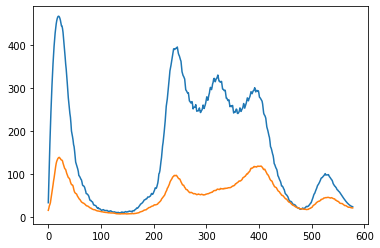

In [ ]:
X = df3.index
Y_deces = df3['nb_deces_quotidien'] #bleu
Y_taux = df3['taux_occupation_sae'] #orange
y = savgol_filter(Y_deces, 51, 3) #lissage de Y
plt.plot(X,y)
plt.plot(X,Y_taux)

In [ ]:
df_test = df3[['nb_deces_quotidien','taux_occupation_sae']]
df_test.corr()

,nb_deces_quotidien,taux_occupation_sae
nb_deces_quotidien,1.000000,0.818858
taux_occupation_sae,0.818858,1.000000


On remarque qu'il y a une corrélation importante entre ces deux indicateurs. Cela se voit à la fois graphiquement et numériquement.

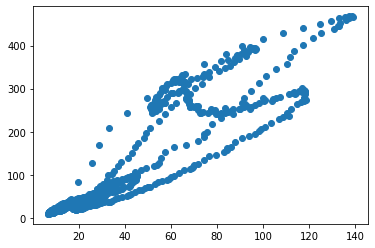

In [ ]:
plt.scatter(Y_taux,y,marker ='o')

On remarque que le nombre de morts est directement lié au taux d'occupation, réalisons un régression pour montrer cela :



In [ ]:
X = Y_taux.values

3.3964475271916745 -15.905894724769354


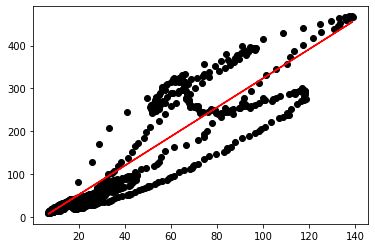

In [ ]:
from scipy import stats
#linregress() renvoie plusieurs variables de retour. On s'interessera 
# particulierement au slope et intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y.T)

def predict(x):
   return slope * x + intercept

#la variable fitLine sera un tableau de valeurs prédites depuis la tableau de variables X
fitLine = predict(X)
plt.plot(X, fitLine, c='r')
plt.scatter(X, y,  color='black')
print(slope,intercept)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,predict(X))

0.7760429769242423

On obtient un score pour cette régression de 0,77.